In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib_inline as matplotlib
from sklearn import preprocessing



In [2]:
df4=pd.read_csv("D:\\Data science\\Case Study 1\\2020\\2020 CSV\\202004-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])
df5=pd.read_csv("D:\\Data science\\Case Study 1\\2020\\2020 CSV\\202005-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])
df=pd.concat([df4,df5])
df=df.reset_index(drop=True)


In [3]:
df4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
df4.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
84771,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,member
84772,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,casual
84773,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,casual
84774,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,casual
84775,79634521ABE4CF69,docked_bike,2020-04-04 01:31:27,2020-04-04 01:37:27,Clybourn Ave & Division St,138,Clybourn Ave & Division St,138.0,41.9046,-87.6406,41.9046,-87.6406,casual


In [5]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             84776 non-null  object        
 1   rideable_type       84776 non-null  object        
 2   started_at          84776 non-null  datetime64[ns]
 3   ended_at            84776 non-null  datetime64[ns]
 4   start_station_name  84776 non-null  object        
 5   start_station_id    84776 non-null  int64         
 6   end_station_name    84677 non-null  object        
 7   end_station_id      84677 non-null  float64       
 8   start_lat           84776 non-null  float64       
 9   start_lng           84776 non-null  float64       
 10  end_lat             84677 non-null  float64       
 11  end_lng             84677 non-null  float64       
 12  member_casual       84776 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [6]:
df4.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      99
end_station_id        99
start_lat              0
start_lng              0
end_lat               99
end_lng               99
member_casual          0
dtype: int64

In [7]:
df4.member_casual.unique()

array(['member', 'casual'], dtype=object)

In [8]:
df4.rideable_type.unique()

array(['docked_bike'], dtype=object)

In [9]:
col=df4.columns
df4.duplicated(col).sum()

0

#### Checking the range of Start station and End station ID's

In [10]:
df4.start_station_id.describe()

count    84776.000000
mean       236.703418
std        160.288883
min          2.000000
25%        113.000000
50%        211.000000
75%        324.000000
max        673.000000
Name: start_station_id, dtype: float64

In [11]:
df4.end_station_id.describe()

count    84677.000000
mean       236.978176
std        160.957429
min          2.000000
25%        113.000000
50%        212.000000
75%        323.000000
max        673.000000
Name: end_station_id, dtype: float64

In [12]:
df4['Trip_duration']=df4['ended_at']-df4['started_at']
df4['Trip_duration']=df4['Trip_duration'].apply(lambda x: x.total_seconds()/60)
index=df4[df4.Trip_duration<0].index
df4.drop(index,inplace=True)
df4=df4.reset_index(drop=True)

In [13]:
df4.count()

ride_id               84725
rideable_type         84725
started_at            84725
ended_at              84725
start_station_name    84725
start_station_id      84725
end_station_name      84626
end_station_id        84626
start_lat             84725
start_lng             84725
end_lat               84626
end_lng               84626
member_casual         84725
Trip_duration         84725
dtype: int64

In [14]:
df4.Trip_duration.describe()

count    84725.000000
mean        35.871780
std        567.705255
min          0.000000
25%          8.750000
50%         16.383333
75%         28.050000
max      58720.033333
Name: Trip_duration, dtype: float64

In [15]:
df4.Trip_duration.median()

16.383333333333333

In [16]:
df4['day_of_week']=df4['started_at'].apply(lambda x:x.weekday())
#df4[df4.day_of_week==0]='Sunday'
#df4[df4.day_of_week==1]='Monday'
#df4[df4.day_of_week==2]='Tuesday'
#df4[df4.day_of_week==3]='Wednesday'
#df4[df4.day_of_week==4]='Thursday'
#df4[df4.day_of_week==5]='Friday'
#df4[df4.day_of_week==6]='Saturday'

In [17]:
df4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_duration,day_of_week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,6
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,5


In [18]:
member=df4[df4.member_casual=='member']
casual=df4[df4.member_casual=='casual']
member=member.reset_index(drop=True)
casual=casual.reset_index(drop=True)

Text(0.5, 1.0, 'Distribution of Total Entries : Member Vs Casual Rides')

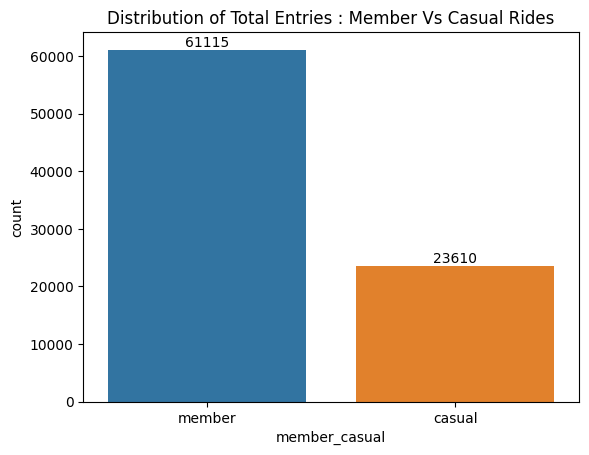

In [43]:

ax=sns.countplot(x='member_casual',data=df4)
for i in ax.containers:
    ax.bar_label(i)
#plt.bar_label(ax,labels=label,label_type='edge')
plt.title("Distribution of Total Entries : Member Vs Casual Rides")

In [20]:
a=[df4.member_casual[df4.member_casual=='member'].count(),df4.member_casual[df4.member_casual=='casual'].count()]

Text(0.5, 1.0, 'Distribution of Total Entries : Member rides Vs Casual rides ')

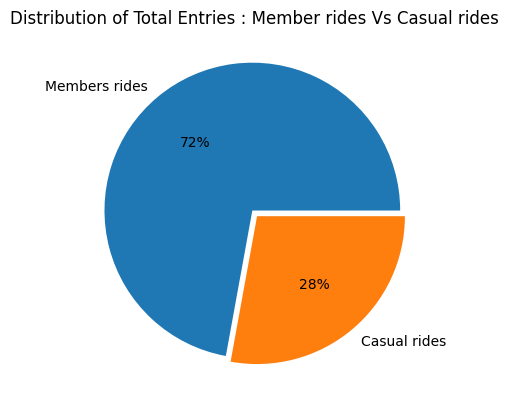

In [21]:
palette_color = sns.color_palette('bright')
explode=[0.05,0,]
plt.pie(a,labels=['Members rides','Casual rides'],explode=explode, autopct='%.0f%%')
plt.title("Distribution of Total Entries : Member rides Vs Casual rides ")

Text(0.5, 1.0, 'Number of rides starting per day in April 2020')

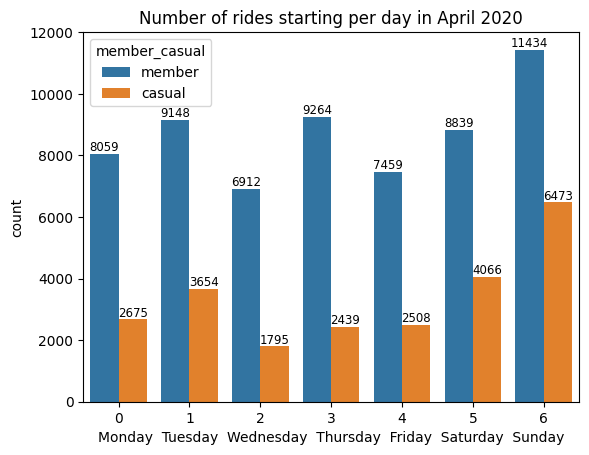

In [23]:
ax=sns.countplot(x=df4.day_of_week,hue=df4.member_casual)
for i in ax.containers:
    ax.bar_label(i,size=8.5)
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.title("Number of rides starting per day in April 2020")

In [24]:
b=[df4.day_of_week[df4.day_of_week==0].count(),df4.day_of_week[df4.day_of_week==1].count(),df4.day_of_week[df4.day_of_week==2].count(),df4.day_of_week[df4.day_of_week==3].count(),df4.day_of_week[df4.day_of_week==4].count(),df4.day_of_week[df4.day_of_week==5].count(),df4.day_of_week[df4.day_of_week==6].count()]

Text(0.5, 1.0, 'Number of rides starting per day in Percentage % ')

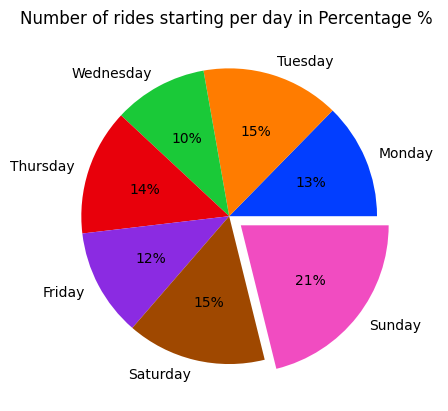

In [25]:
palette_color = sns.color_palette('bright')
label=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
explode=[0,0,0,0,0,0,0.1]
plt.pie(b,labels=label,colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title("Number of rides starting per day in Percentage % ")

Text(0.5, 1.0, 'Rides started by Cyclist Members per day for April 2020 ')

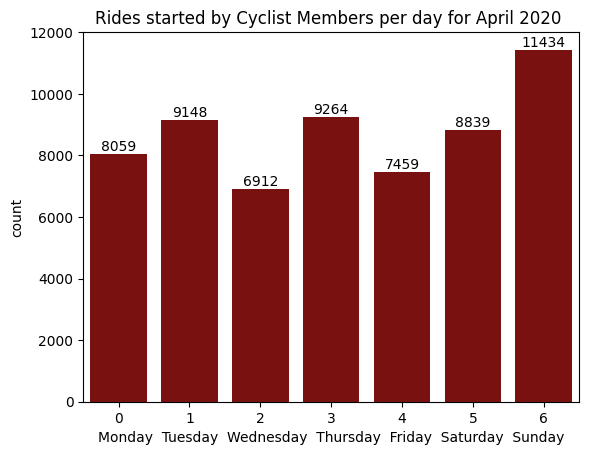

In [69]:
ax=sns.countplot(member,x='day_of_week',color='darkred')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.title("Rides started by Cyclist Members per day for April 2020 ")

Text(0.5, 1.0, 'Rides started by Cyclist Members per day for April 2020 ')

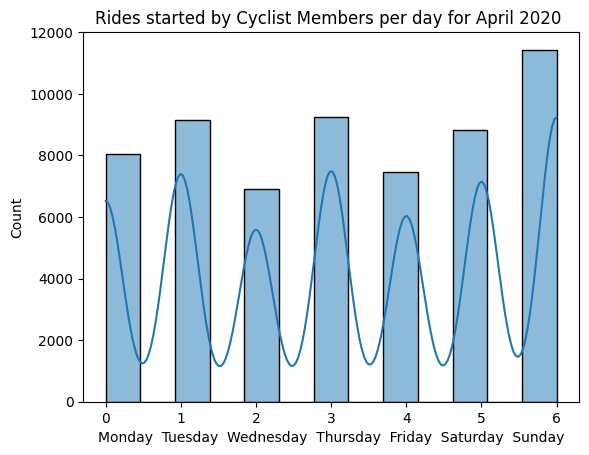

In [68]:
sns.histplot(member,x='day_of_week',bins=13,kde=True)
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.title("Rides started by Cyclist Members per day for April 2020 ")

Text(0.5, 1.0, 'Rides started by Cyclist Casual users per day for April 2020 ')

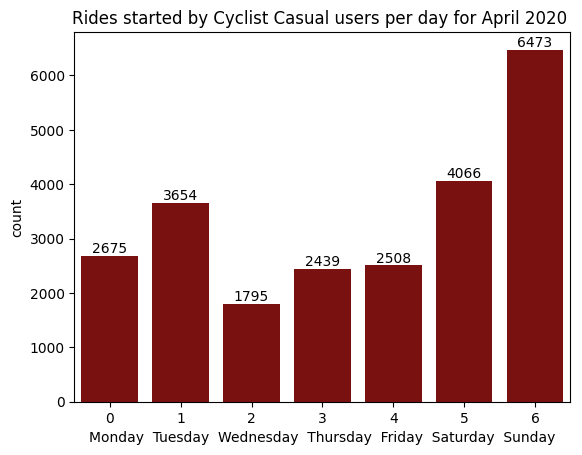

In [70]:
ax=sns.countplot(casual,x='day_of_week',color='darkred')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.title("Rides started by Cyclist Casual users per day for April 2020 ")

Text(0.5, 1.0, 'Rides started by Cyclist Casual users per day for April 2020 ')

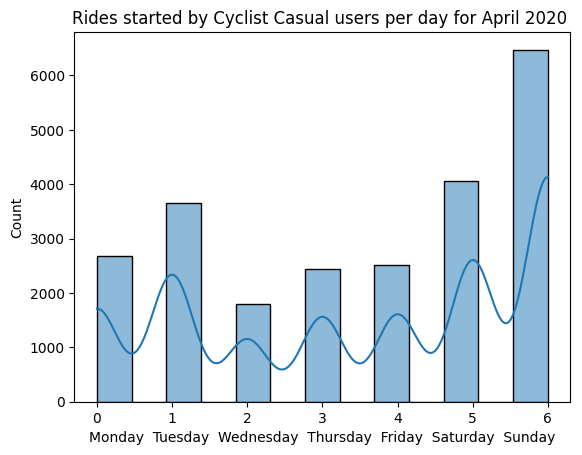

In [71]:
sns.histplot(casual,x='day_of_week',bins=13,kde=True)
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.title("Rides started by Cyclist Casual users per day for April 2020 ")

Text(0.5, 1.0, 'Trip duration : Member Vs Casual Riders')

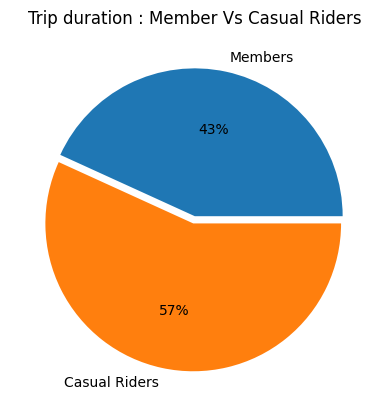

In [28]:
c=[member.Trip_duration.sum(),casual.Trip_duration.sum()]
explode=[0,0.05]
plt.pie(c,labels=['Members','Casual Riders'],explode=explode,autopct='%.0f%%')
plt.title('Trip duration : Member Vs Casual Riders')

#### Finding out Cyclist member rider's Trip duration values i.e min, max, mean, median.

In [29]:
member.Trip_duration.describe()

count    61115.000000
mean        21.479287
std        364.258555
min          0.000000
25%          7.466667
50%         13.700000
75%         23.800000
max      58720.033333
Name: Trip_duration, dtype: float64

In [30]:
member[member.Trip_duration==member.Trip_duration.max()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_duration,day_of_week
12419,FF4F7C2895AF4127,docked_bike,2020-04-19 20:50:53,2020-05-30 15:30:55,Wabash Ave & Wacker Pl,194,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),671.0,41.8869,-87.626,41.89,-87.6807,member,58720.033333,6


<AxesSubplot: ylabel='Trip_duration'>

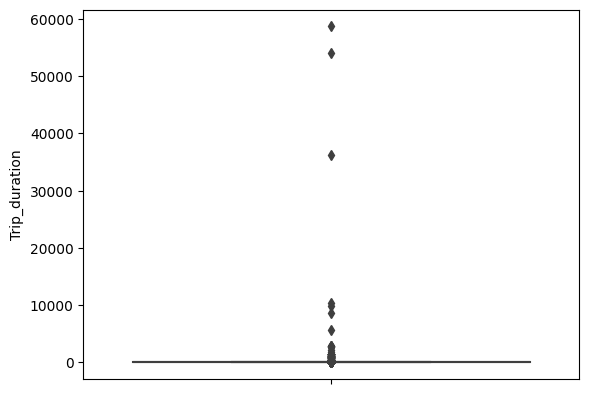

In [31]:
sns.boxplot(y=member.Trip_duration)

#### Finding out Cyclist casual rider's Trip duration values i.e min, max, mean, median.

In [32]:
casual.Trip_duration.describe()

count    23610.000000
mean        73.127065
std        900.659763
min          0.000000
25%         14.683333
50%         25.283333
75%         42.800000
max      55683.883333
Name: Trip_duration, dtype: float64

In [33]:
casual[casual.Trip_duration==casual.Trip_duration.max()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_duration,day_of_week
23380,F423D1055877936F,docked_bike,2020-04-03 16:33:09,2020-05-12 08:37:02,Sedgwick St & Schiller St,236,LaSalle St & Jackson Blvd,283.0,41.9076,-87.6386,41.8782,-87.6319,casual,55683.883333,4


Text(0.5, 0, ' ')

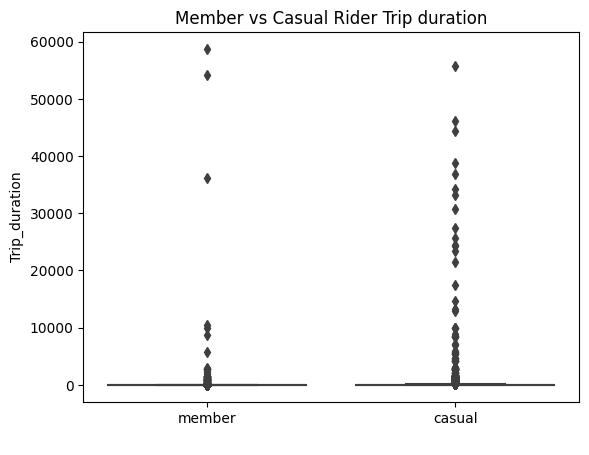

In [34]:
sns.boxplot(y='Trip_duration',x='member_casual',data=df4)
plt.title('Member vs Casual Rider Trip duration')
plt.xlabel(' ')

Text(0.5, 1.0, 'Cyclist Members Trip duration distribution over a week for April 2020')

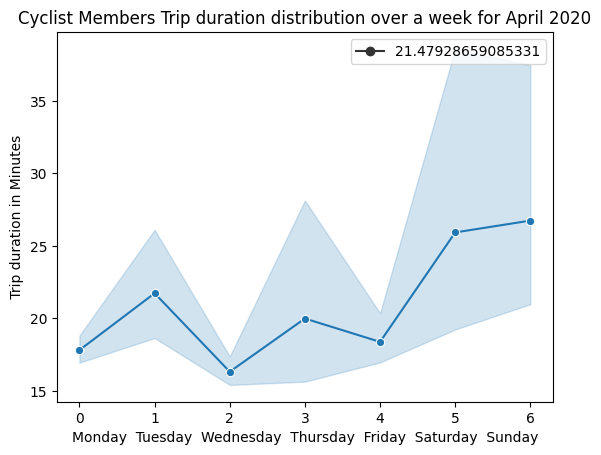

In [35]:
sns.lineplot(data=member,x='day_of_week',y='Trip_duration',markers=True,style=member.Trip_duration.mean())
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.ylabel(" Trip duration in Minutes ")
plt.title("Cyclist Members Trip duration distribution over a week for April 2020")

Text(0.5, 1.0, "Cyclist Casual rider's Trip duration distribution over a week for April 2020")

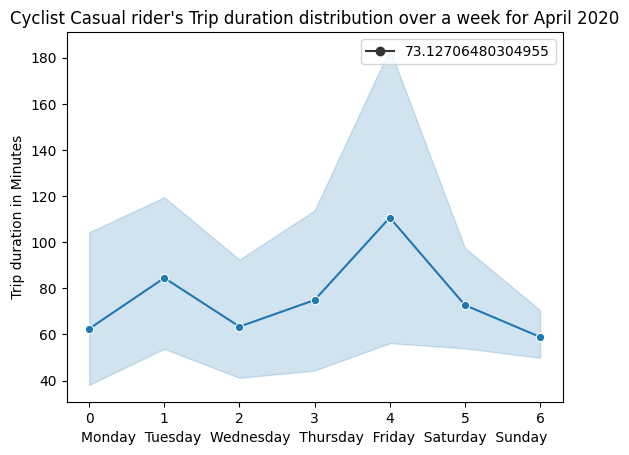

In [36]:
ax=sns.lineplot(data=casual,x='day_of_week',y='Trip_duration',markers=True,style=casual.Trip_duration.mean())
plt.xlabel("Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday")
plt.ylabel(" Trip duration in Minutes ")
plt.title("Cyclist Casual rider's Trip duration distribution over a week for April 2020")

Text(0.5, 1.0, 'Distribution of rides by Start Station ID for Casual Riders ')

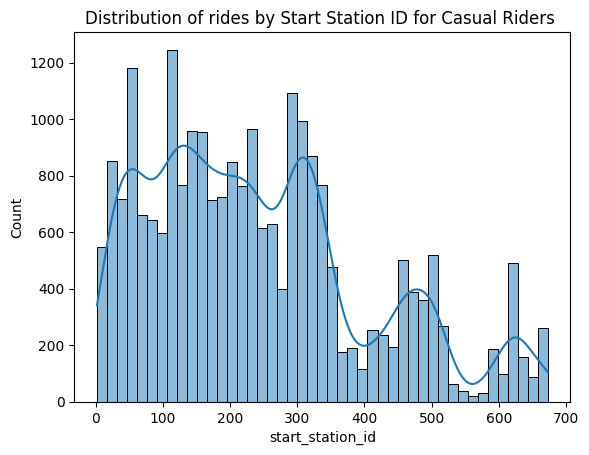

In [37]:
sns.histplot(casual,x='start_station_id',kde=True)
plt.title('Distribution of rides by Start Station ID for Casual Riders ')

Text(0.5, 1.0, 'Distribution of rides by End Station ID for Casual Riders ')

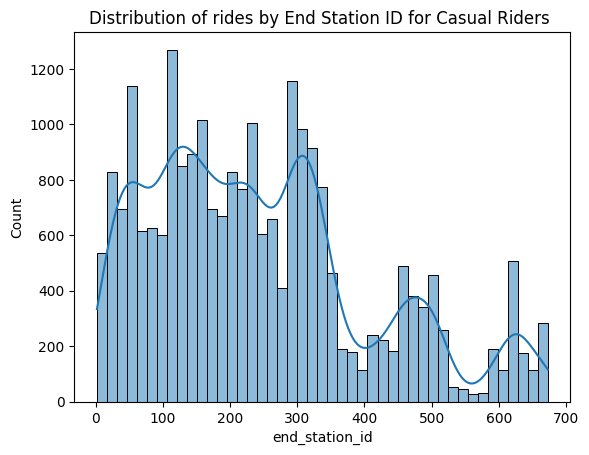

In [38]:
sns.histplot(casual,x='end_station_id',kde=True)
plt.title('Distribution of rides by End Station ID for Casual Riders ')

Text(0.5, 1.0, 'Distribution of rides by Start Station ID for Cyclist members ')

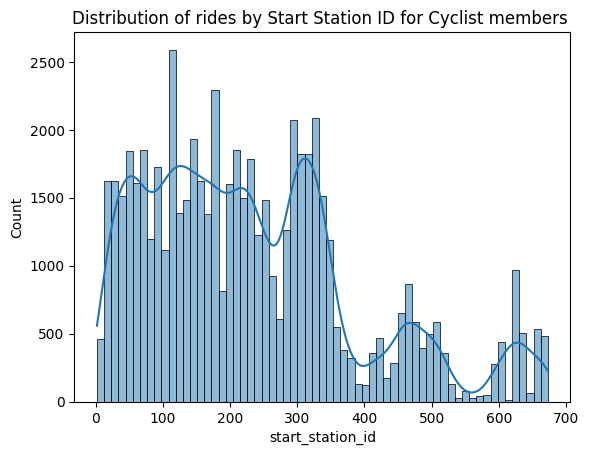

In [39]:
sns.histplot(member,x='start_station_id',kde=True)
plt.title('Distribution of rides by Start Station ID for Cyclist members ')

Text(0.5, 1.0, 'Distribution of rides by End Station ID for Cyclist members ')

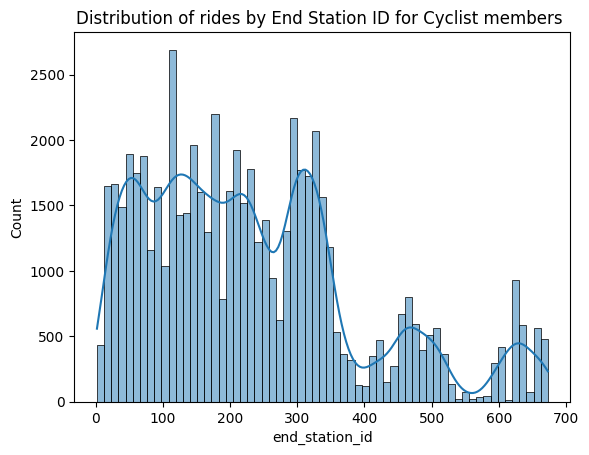

In [40]:
sns.histplot(member,x='end_station_id',kde=True)
plt.title('Distribution of rides by End Station ID for Cyclist members ')